In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import circlify
import squarify

In [2]:
ipl_matches = pd.read_csv('./IPL_Matches_2008_2022.csv')

In [3]:
batting_stats = pd.read_csv('./batsmen_stats.csv', index_col=0)
bowling_stats = pd.read_csv('./bowling_stats.csv', index_col=0)
                                                                                    

In [4]:
batting_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,...,avg_pp,avg_mo,avg_death,avg_first,avg_second,sr_pp,sr_mo,sr_death,sr_first,sr_second
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,...,5.00,12.20,15.29,23.71,14.25,83.33,148.78,146.58,146.90,142.50
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,...,1.00,19.67,25.25,26.50,13.75,16.67,101.72,153.03,123.26,125.00
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,...,0.00,0.00,2.00,2.00,0.00,0.00,0.00,57.14,57.14,0.00
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,...,9.00,12.50,1.00,10.20,2.00,69.23,83.33,50.00,75.00,66.67
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,...,0.00,0.00,25.00,15.00,10.00,0.00,0.00,125.00,125.00,125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,...,17.00,6.50,17.00,13.00,11.33,47.22,76.47,130.77,65.00,73.91
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,...,3.00,0.00,0.00,0.00,3.00,42.86,0.00,0.00,0.00,42.86
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,...,15.75,29.04,21.57,24.75,24.80,102.72,115.33,180.84,138.41,120.51


In [5]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,...,wickets_taken_in_first_innings,runs_given_in_second_innings,balls_bowled_in_second_innings,wickets_taken_in_second_innings,economy_in_first_innings,economy_in_second_innings,bowl_avg_in_first_innings,bowl_avg_in_second_innings,bowl_sr_in_first_innings,bowl_sr_in_second_innings
A Ashish Reddy,20,262,396,18,9.07,22.00,14.56,3/25,1,0,...,7,251,167,11,9.16,9.02,20.71,22.82,13.57,15.18
A Badoni,2,12,11,2,5.50,5.50,6.00,1/5,0,0,...,1,6,6,1,5.00,6.00,5.00,6.00,6.00,6.00
A Chandila,12,234,242,11,6.21,22.00,21.27,4/13,0,1,...,3,100,114,8,7.10,5.26,47.33,12.50,40.00,14.25
A Choudhary,5,101,144,5,8.55,28.80,20.20,2/17,0,0,...,3,72,53,2,9.00,8.15,24.00,36.00,16.00,26.50
A Dananjaya,1,24,47,0,11.75,0.00,0.00,0/47,0,0,...,0,47,24,0,0.00,11.75,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42,7.40,33.69,27.31,3/20,3,0,...,27,597,481,15,7.37,7.45,30.30,39.80,24.67,32.07
YS Chahal,130,2856,3624,166,7.61,21.83,17.20,5/40,11,3,...,73,1992,1613,93,7.88,7.41,22.36,21.42,17.03,17.34
Yash Dayal,9,192,296,11,9.25,26.91,17.45,3/40,1,0,...,4,141,84,7,8.61,10.07,38.75,20.14,27.00,12.00
Yuvraj Singh,73,869,1077,36,7.44,29.92,24.14,4/29,2,2,...,16,532,431,20,7.47,7.41,34.06,26.60,27.38,21.55


In [6]:
ipl_matches['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

### Top 10 Most innings played batsmen

In [7]:
batting_stats.columns

Index(['innings', 'second_innings_notouts', 'first_innings_notouts',
       'combined_notouts', 'balls_faced', 'total_runs', 'highest_score',
       'average', 'strike_rate', '50s', '100s', '30s', '6s', '4s',
       'runs_scored_in_pp', 'balls_faced_in_pp', 'innings_pp', 'notouts_pp',
       'runs_scored_in_mo', 'balls_faced_in_mo', 'innings_mo', 'notouts_mo',
       'runs_scored_in_death', 'balls_faced_in_death', 'innings_death',
       'notouts_death', 'runs_scored_in_first_innings',
       'balls_faced_in_first_innings', 'innings_first', 'notouts_first',
       'runs_scored_in_second_innings', 'balls_faced_in_second_innings',
       'innings_second', 'notouts_second', 'avg_pp', 'avg_mo', 'avg_death',
       'avg_first', 'avg_second', 'sr_pp', 'sr_mo', 'sr_death', 'sr_first',
       'sr_second'],
      dtype='object')

In [8]:
required_columns = ['innings', 'balls_faced', 'total_runs', 'highest_score',
       'average', 'strike_rate', '50s', '100s', '30s', '6s', '4s', 'second_innings_notouts', 'first_innings_notouts',
       'combined_notouts']

In [9]:
top_20_innings = batting_stats[required_columns].nlargest(20, 'innings')

In [10]:
top_20_innings

,innings,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s,second_innings_notouts,first_innings_notouts,combined_notouts
RG Sharma,222,4526,5879,109,30.30,129.89,40.0,1.0,43.0,240.0,519.0,18,10,28
V Kohli,215,5129,6624,113,36.20,129.15,44.0,5.0,47.0,218.0,578.0,22,10,32
KD Karthik,208,3299,4376,97,26.85,132.65,20.0,0.0,40.0,134.0,426.0,26,19,45
MS Dhoni,206,3682,4978,84,39.20,135.20,24.0,0.0,40.0,229.0,346.0,32,47,79
S Dhawan,205,4942,6244,106,34.88,126.35,47.0,2.0,39.0,136.0,701.0,16,10,26
SK Raina,200,4043,5528,100,32.52,136.73,39.0,1.0,37.0,203.0,506.0,20,10,30
RV Uthappa,197,3799,4952,88,27.51,130.35,27.0,0.0,45.0,182.0,481.0,12,5,17
AT Rayudu,175,3296,4190,100,28.90,127.12,22.0,1.0,37.0,164.0,349.0,14,16,30
KA Pollard,171,2316,3412,87,28.67,147.32,16.0,0.0,20.0,223.0,218.0,21,31,52
AB de Villiers,170,3403,5162,133,39.71,151.69,40.0,3.0,23.0,251.0,413.0,21,19,40


<AxesSubplot: xlabel='innings', ylabel='index'>

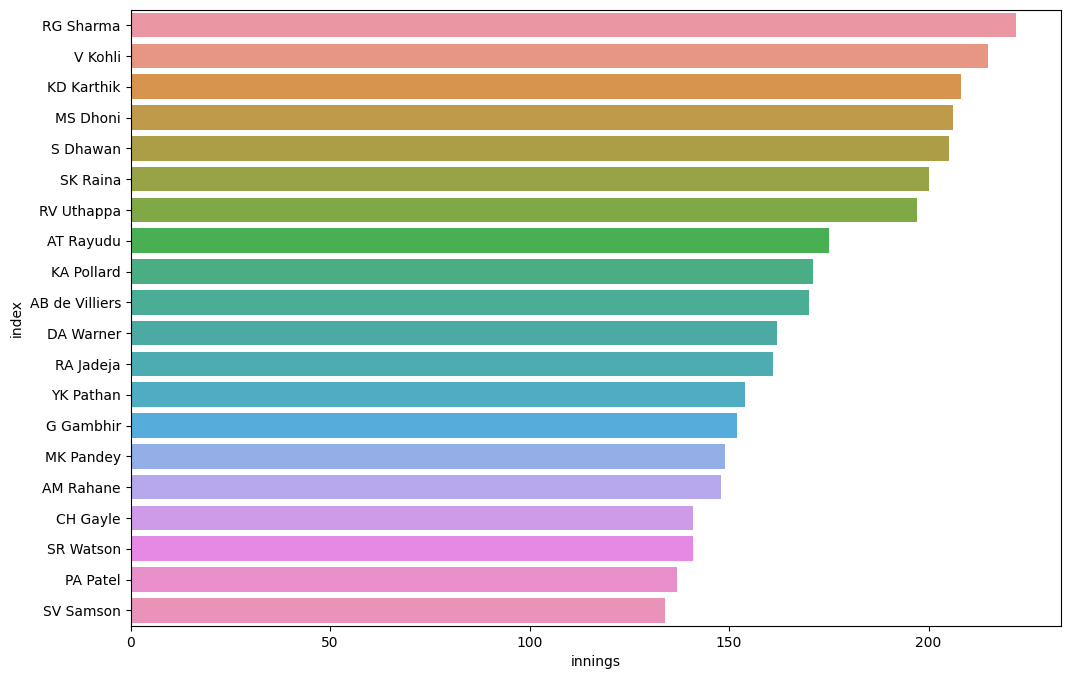

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_innings.reset_index(), x='innings', y='index', orient='h')

(0.0, 300.0)

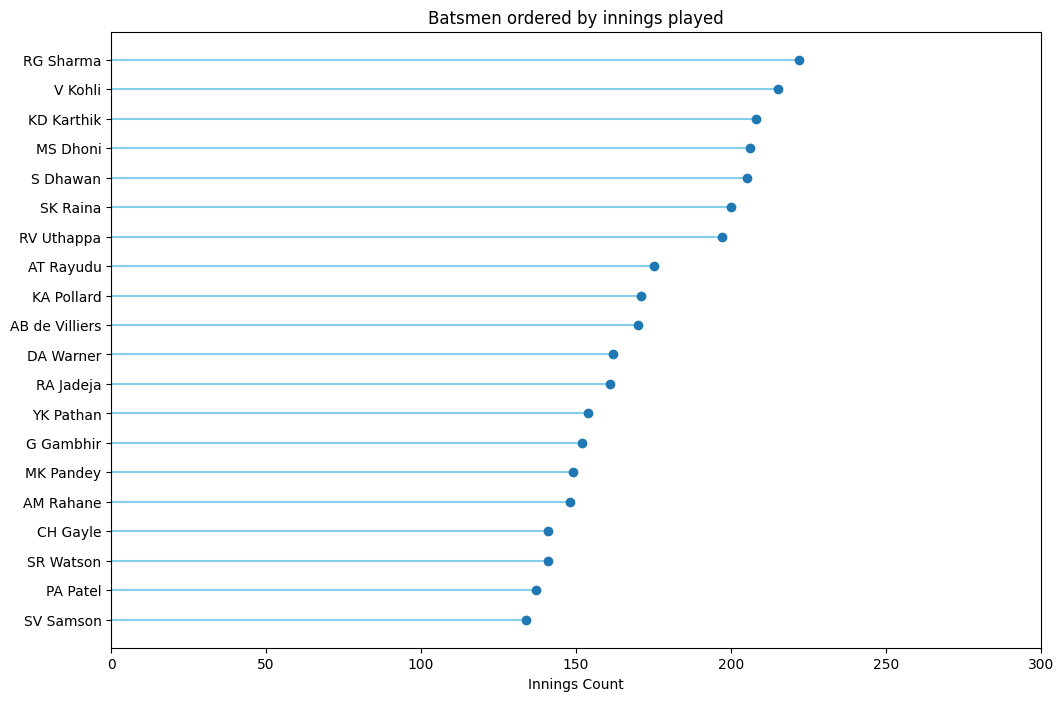

In [12]:
# The horizontal plot is made using the hline function
top_20_innings = top_20_innings.sort_values(by='innings')
plt.figure(figsize=(12, 8))
plt.hlines(y=top_20_innings.index, xmin=0, xmax=top_20_innings['innings'], color='skyblue')
plt.plot(top_20_innings['innings'], top_20_innings.index, "o")
 
# Add titles and axis names
plt.title("Batsmen ordered by innings played")
plt.xlabel('Innings Count')
plt.xlim(0, top_20_innings['innings'].max() + 5)
plt.xlim(0, 300)

# plt.ylabel('Name')

# Show the plot
# plt.show()

In [13]:
batting_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,...,avg_pp,avg_mo,avg_death,avg_first,avg_second,sr_pp,sr_mo,sr_death,sr_first,sr_second
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,...,5.00,12.20,15.29,23.71,14.25,83.33,148.78,146.58,146.90,142.50
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,...,1.00,19.67,25.25,26.50,13.75,16.67,101.72,153.03,123.26,125.00
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,...,0.00,0.00,2.00,2.00,0.00,0.00,0.00,57.14,57.14,0.00
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,...,9.00,12.50,1.00,10.20,2.00,69.23,83.33,50.00,75.00,66.67
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,...,0.00,0.00,25.00,15.00,10.00,0.00,0.00,125.00,125.00,125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,...,17.00,6.50,17.00,13.00,11.33,47.22,76.47,130.77,65.00,73.91
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,...,3.00,0.00,0.00,0.00,3.00,42.86,0.00,0.00,0.00,42.86
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,...,15.75,29.04,21.57,24.75,24.80,102.72,115.33,180.84,138.41,120.51


In [14]:
balls_faced = batting_stats[required_columns].nlargest(20, 'balls_faced')

In [15]:
balls_faced

,innings,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s,second_innings_notouts,first_innings_notouts,combined_notouts
V Kohli,215,5129,6624,113,36.20,129.15,44.0,5.0,47.0,218.0,578.0,22,10,32
S Dhawan,205,4942,6244,106,34.88,126.35,47.0,2.0,39.0,136.0,701.0,16,10,26
RG Sharma,222,4526,5879,109,30.30,129.89,40.0,1.0,43.0,240.0,519.0,18,10,28
DA Warner,162,4180,5881,126,42.01,140.69,55.0,4.0,27.0,216.0,577.0,13,9,22
SK Raina,200,4043,5528,100,32.52,136.73,39.0,1.0,37.0,203.0,506.0,20,10,30
RV Uthappa,197,3799,4952,88,27.51,130.35,27.0,0.0,45.0,182.0,481.0,12,5,17
MS Dhoni,206,3682,4978,84,39.20,135.20,24.0,0.0,40.0,229.0,346.0,32,47,79
G Gambhir,152,3404,4217,93,31.01,123.88,36.0,0.0,22.0,59.0,492.0,16,0,16
AB de Villiers,170,3403,5162,133,39.71,151.69,40.0,3.0,23.0,251.0,413.0,21,19,40
AM Rahane,148,3376,4074,105,30.86,120.68,28.0,2.0,27.0,80.0,431.0,11,5,16


In [16]:
((balls_faced['total_runs'] - balls_faced['balls_faced']) / balls_faced['total_runs'] * 100).sort_values(ascending=False)

AB de Villiers    34.075940
CH Gayle          32.870091
KA Pollard        32.121923
DA Warner         28.923652
SR Watson         27.490965
SK Raina          26.863242
KL Rahul          26.587812
SV Samson         26.318775
MS Dhoni          26.034552
KD Karthik        24.611517
F du Plessis      23.420511
RV Uthappa        23.283522
RG Sharma         23.014118
V Kohli           22.569444
AT Rayudu         21.336516
S Dhawan          20.852018
G Gambhir         19.279108
MK Pandey         17.708333
PA Patel          17.205056
AM Rahane         17.133039
dtype: float64

In [17]:
((balls_faced['total_runs'] - balls_faced['balls_faced']) / balls_faced['total_runs'] * 100).sort_values(ascending=False)

AB de Villiers    34.075940
CH Gayle          32.870091
KA Pollard        32.121923
DA Warner         28.923652
SR Watson         27.490965
SK Raina          26.863242
KL Rahul          26.587812
SV Samson         26.318775
MS Dhoni          26.034552
KD Karthik        24.611517
F du Plessis      23.420511
RV Uthappa        23.283522
RG Sharma         23.014118
V Kohli           22.569444
AT Rayudu         21.336516
S Dhawan          20.852018
G Gambhir         19.279108
MK Pandey         17.708333
PA Patel          17.205056
AM Rahane         17.133039
dtype: float64

In [18]:
balls_faced['average_runs_per_ball'] = (np.round(balls_faced['total_runs'] / balls_faced['balls_faced'], 2))

In [19]:
balls_faced.sort_values(by='average_runs_per_ball', ascending=False)

,innings,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s,second_innings_notouts,first_innings_notouts,combined_notouts,average_runs_per_ball
AB de Villiers,170,3403,5162,133,39.71,151.69,40.0,3.0,23.0,251.0,413.0,21,19,40,1.52
CH Gayle,141,3333,4965,175,39.72,148.96,31.0,6.0,24.0,357.0,404.0,11,5,16,1.49
KA Pollard,171,2316,3412,87,28.67,147.32,16.0,0.0,20.0,223.0,218.0,21,31,52,1.47
DA Warner,162,4180,5881,126,42.01,140.69,55.0,4.0,27.0,216.0,577.0,13,9,22,1.41
SR Watson,141,2809,3874,117,30.99,137.91,21.0,4.0,27.0,190.0,376.0,11,5,16,1.38
SK Raina,200,4043,5528,100,32.52,136.73,39.0,1.0,37.0,203.0,506.0,20,10,30,1.37
SV Samson,134,2598,3526,119,29.14,135.72,17.0,3.0,28.0,158.0,279.0,9,4,13,1.36
KL Rahul,100,2855,3889,132,48.01,136.22,31.0,4.0,14.0,164.0,327.0,8,11,19,1.36
MS Dhoni,206,3682,4978,84,39.20,135.20,24.0,0.0,40.0,229.0,346.0,32,47,79,1.35
KD Karthik,208,3299,4376,97,26.85,132.65,20.0,0.0,40.0,134.0,426.0,26,19,45,1.33


In [20]:
batting_stats[required_columns].nlargest(10, 'highest_score')

,innings,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s,second_innings_notouts,first_innings_notouts,combined_notouts
CH Gayle,141,3333,4965,175,39.72,148.96,31.0,6.0,24.0,357.0,404.0,11,5,16
BB McCullum,109,2186,2880,158,27.69,131.75,13.0,2.0,29.0,130.0,293.0,2,3,5
Q de Kock,92,2064,2764,140,32.14,133.91,19.0,2.0,16.0,106.0,277.0,4,2,6
AB de Villiers,170,3403,5162,133,39.71,151.69,40.0,3.0,23.0,251.0,413.0,21,19,40
KL Rahul,100,2855,3889,132,48.01,136.22,31.0,4.0,14.0,164.0,327.0,8,11,19
RR Pant,97,1918,2838,128,34.61,147.97,15.0,1.0,28.0,129.0,260.0,9,6,15
M Vijay,106,2149,2619,127,25.93,121.87,13.0,2.0,21.0,91.0,247.0,5,0,5
DA Warner,162,4180,5881,126,42.01,140.69,55.0,4.0,27.0,216.0,577.0,13,9,22
JC Buttler,81,1891,2831,124,39.87,149.71,15.0,5.0,12.0,135.0,277.0,7,3,10
V Sehwag,104,1754,2728,122,27.56,155.53,16.0,2.0,17.0,106.0,334.0,4,1,5


In [21]:
# compute circle positions:
circles = circlify.circlify(
    batting_stats[required_columns].nlargest(10, 'highest_score')['highest_score'].values.tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

In [22]:
batting_stats[required_columns].nlargest(10, 'highest_score')['highest_score'].values

array([175, 158, 140, 133, 132, 128, 127, 126, 124, 122], dtype=int64)

In [23]:
circles

[Circle(x=-0.40028961860975615, y=-0.6496075659998758, r=0.23696542111708524, level=1, ex={'datum': 122}),
 Circle(x=0.15441285907953847, y=-0.6868709072554529, r=0.2388998648148664, level=1, ex={'datum': 124}),
 Circle(x=-0.5765719476656628, y=-0.20553293961505759, r=0.24081877005733032, level=1, ex={'datum': 126}),
 Circle(x=-0.38046985429639396, y=0.23541866090877575, r=0.24177251149294718, level=1, ex={'datum': 127}),
 Circle(x=-0.09832491161791136, y=-0.2768907531873116, r=0.24272250537453102, level=1, ex={'datum': 128}),
 Circle(x=-0.10886168099479272, y=0.6411590295241019, r=0.2464858694165185, level=1, ex={'datum': 132}),
 Circle(x=0.391598584082867, y=-0.2623149388932329, r=0.24741776638652888, level=1, ex={'datum': 133}),
 Circle(x=0.39143441158151443, y=0.635236947286306, r=0.2538452722338405, level=1, ex={'datum': 140}),
 Circle(x=0.1282475706707358, y=0.18268688651204826, r=0.26967060215334493, level=1, ex={'datum': 158}),
 Circle(x=0.6817258150649844, y=0.1826868865120482

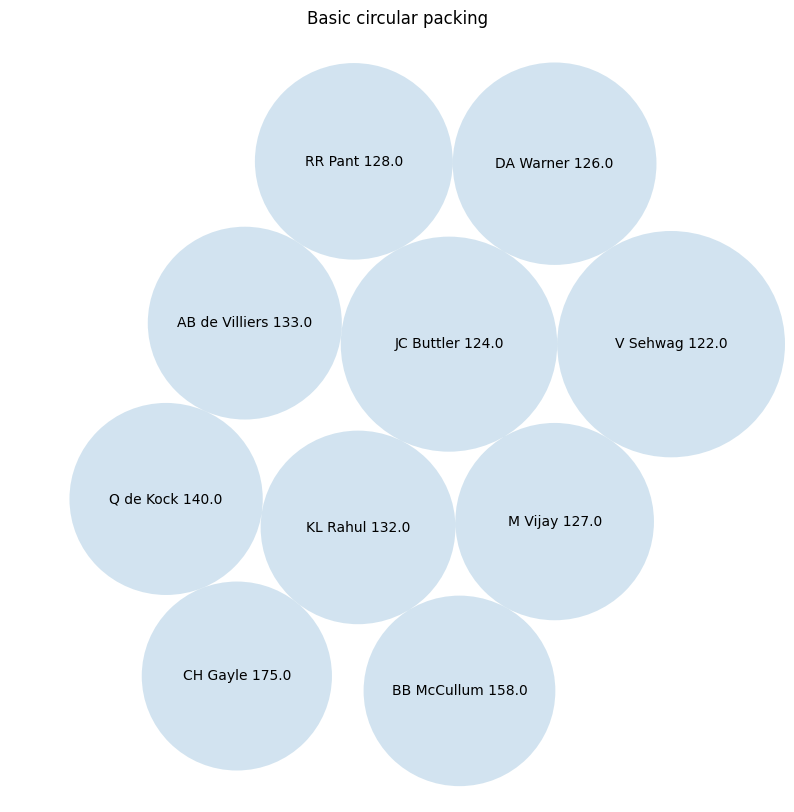

In [24]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = batting_stats[required_columns].nlargest(10, 'highest_score').reset_index()['index']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
          f"{label} {batting_stats[required_columns].nlargest(10, 'highest_score').loc[label]['highest_score']}", 
          (x,y ) ,
          va='center',
          ha='center'
     )

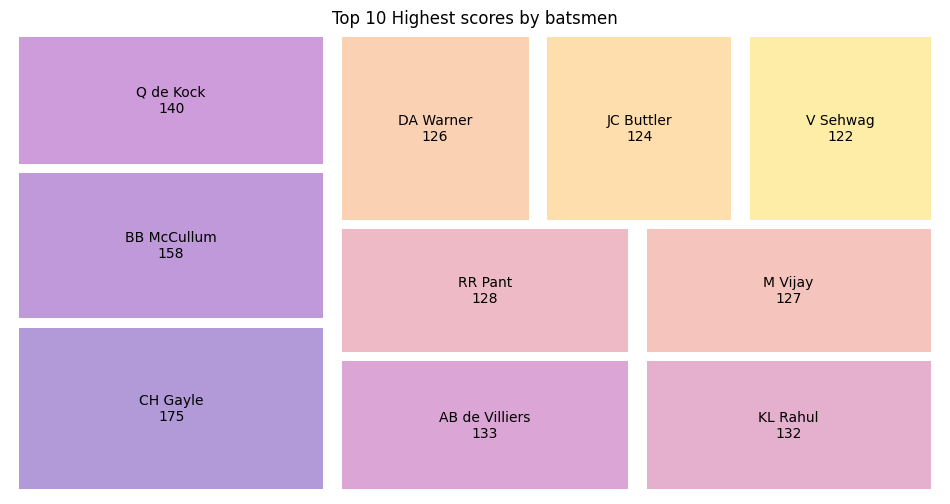

In [25]:
# Change color
plt.figure(figsize=(12, 6))
hs = batting_stats[required_columns].nlargest(10, 'highest_score')
label = hs.reset_index()['index'].astype(str) + "\n"  + hs.reset_index()['highest_score'].astype(str)

squarify.plot(
    sizes=hs['highest_score'],
    label=label,
    alpha=.4,
    color=sns.color_palette("plasma", len(label)),
    pad=2)
plt.title('Top 10 Highest scores by batsmen')
plt.axis('off');


In [26]:
def autolabel(data,rects,label, width_to_sub):
    for i,p in enumerate(rects):
        width = p.get_width()    # get bar length
        ax.text(width - width_to_sub,       # set the text at 1 unit right of the bar
        p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
        label[i], # set variable to display, 2 decimals
        ha = 'left',   # horizontal alignment
        va = 'center',
        color='white')

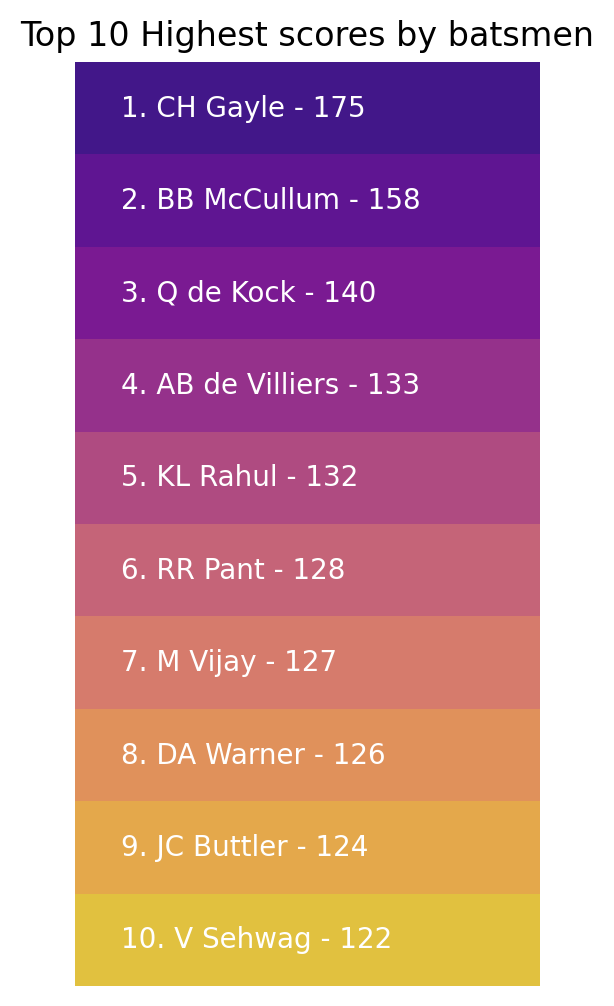

In [27]:
plt.figure(dpi=200, figsize=(3, 6))
ax = sns.barplot(data=hs.reset_index(), x=[100] * len(hs), y='index', orient='h', width=1, palette='plasma')
# ax.set_xticklabels([])
plt.xlim(0, 100)
plt.axis('off')
plt.title('Top 10 Highest scores by batsmen')

# ax.bar_label(ax.containers[0], fmt='%.0f', label_type='inside', padding=2)
label = np.array([f"{i}. " for i in range(1, len(hs)+1)]) + hs.reset_index()['index'].astype(str) + ' - '  + hs.reset_index()['highest_score'].astype(str)
autolabel(hs, ax.patches, label, 90)
plt.savefig('higest_scores.png')

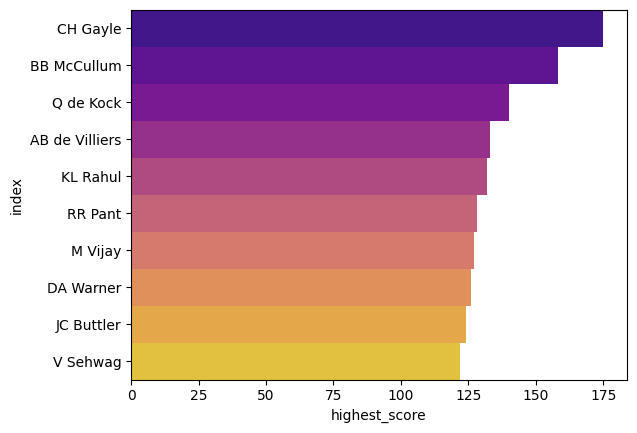

In [28]:
ax = sns.barplot(data=hs.reset_index(), x='highest_score', y='index', orient='h', width=1, palette='plasma')

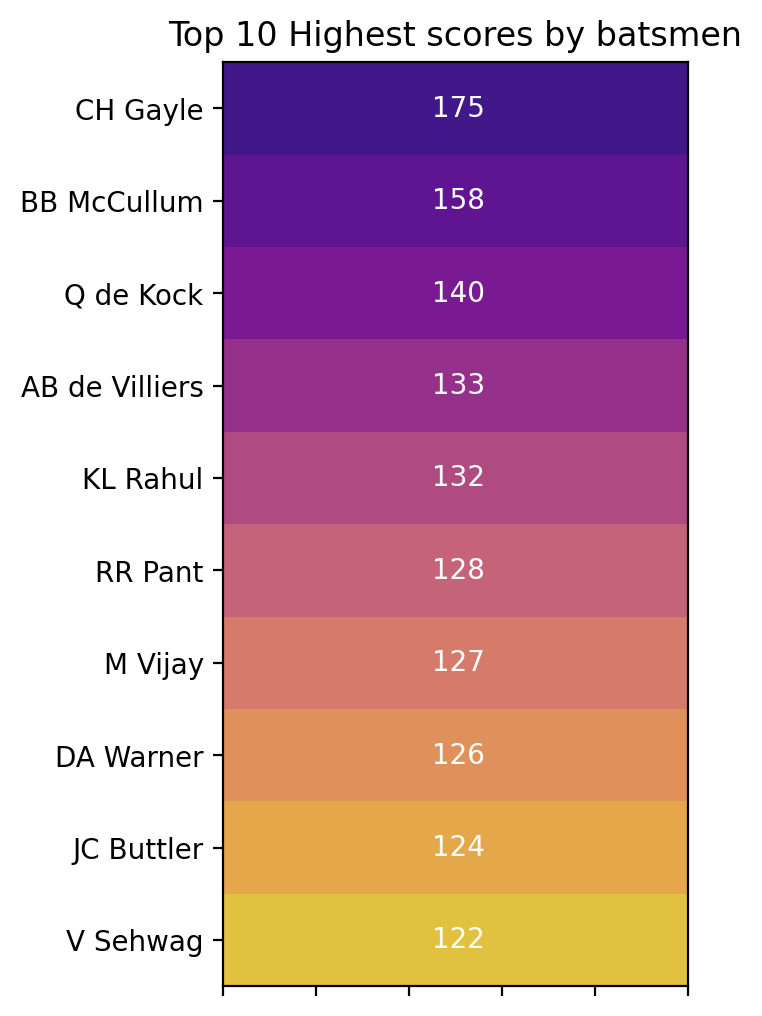

In [29]:
plt.figure(dpi=200, figsize=(3, 6))
ax = sns.barplot(data=hs.reset_index(), x=[100] * len(hs), y='index', orient='h', width=1, palette='plasma')
plt.xlim(0, 100)
plt.title('Top 10 Highest scores by batsmen')

# ax.bar_label(ax.containers[0], fmt='%.0f', label_type='inside', padding=2)
label = hs.reset_index()['highest_score'].astype(str)
autolabel(hs, ax.patches, label, 55)
ax.set_xticklabels([]);
ax.set_ylabel('')
plt.savefig('higest_scores1.png', bbox_inches='tight')

In [30]:
batting_stats[required_columns].corr()

,innings,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s,second_innings_notouts,first_innings_notouts,combined_notouts
innings,1.000000,0.955994,0.954492,0.731084,0.549211,0.328571,0.859378,0.522410,0.936895,0.893870,0.928667,0.832787,0.672980,0.793094
balls_faced,0.955994,1.000000,0.996510,0.748252,0.584788,0.296303,0.955719,0.630964,0.964250,0.908115,0.986582,0.708659,0.504465,0.638503
total_runs,0.954492,0.996510,1.000000,0.751999,0.587499,0.308167,0.960554,0.654352,0.962608,0.933751,0.985228,0.708264,0.508973,0.640702
highest_score,0.731084,0.748252,0.751999,1.000000,0.835896,0.536004,0.686971,0.542011,0.736630,0.727945,0.744517,0.481512,0.358167,0.442056
average,0.549211,0.584788,0.587499,0.835896,1.000000,0.584027,0.546144,0.390479,0.578440,0.557956,0.573108,0.400614,0.332534,0.386211
strike_rate,0.328571,0.296303,0.308167,0.536004,0.584027,1.000000,0.254471,0.173261,0.311394,0.326847,0.294749,0.248675,0.223819,0.249017
50s,0.859378,0.955719,0.960554,0.686971,0.546144,0.254471,1.000000,0.669667,0.882260,0.875827,0.962313,0.588975,0.369249,0.503990
100s,0.522410,0.630964,0.654352,0.542011,0.390479,0.173261,0.669667,1.000000,0.541999,0.682987,0.646863,0.323779,0.150092,0.248847
30s,0.936895,0.964250,0.962608,0.736630,0.578440,0.311394,0.882260,0.541999,1.000000,0.888373,0.947999,0.686762,0.501067,0.625276
6s,0.893870,0.908115,0.933751,0.727945,0.557956,0.326847,0.875827,0.682987,0.888373,1.000000,0.878610,0.678652,0.529089,0.635993


In [31]:
# sns.pairplot(batting_stats[required_columns[:6]])

<AxesSubplot: >

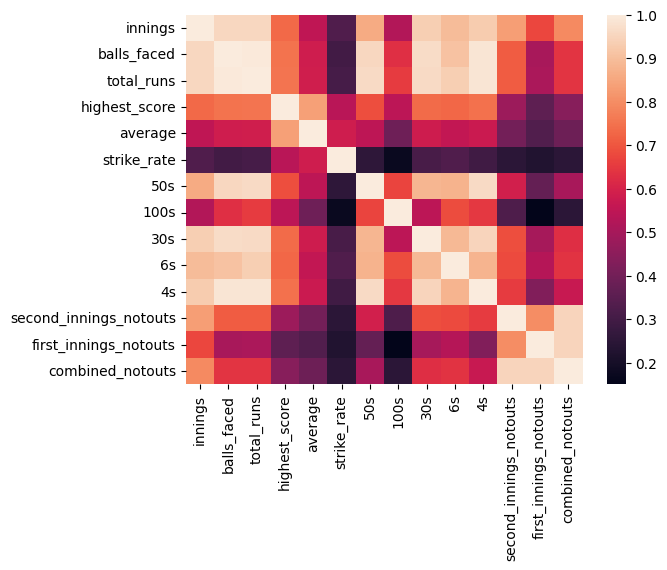

In [32]:
sns.heatmap(batting_stats[required_columns].corr())

In [33]:
batting_stats.loc['MS Dhoni']

innings                           206.00
second_innings_notouts             32.00
first_innings_notouts              47.00
combined_notouts                   79.00
balls_faced                      3682.00
total_runs                       4978.00
highest_score                      84.00
average                            39.20
strike_rate                       135.20
50s                                24.00
100s                                0.00
30s                                40.00
6s                                229.00
4s                                346.00
runs_scored_in_pp                  59.00
balls_faced_in_pp                  72.00
innings_pp                         19.00
notouts_pp                         17.00
runs_scored_in_mo                1892.00
balls_faced_in_mo                1873.00
innings_mo                        162.00
notouts_mo                        122.00
runs_scored_in_death             3027.00
balls_faced_in_death             1737.00
innings_death   

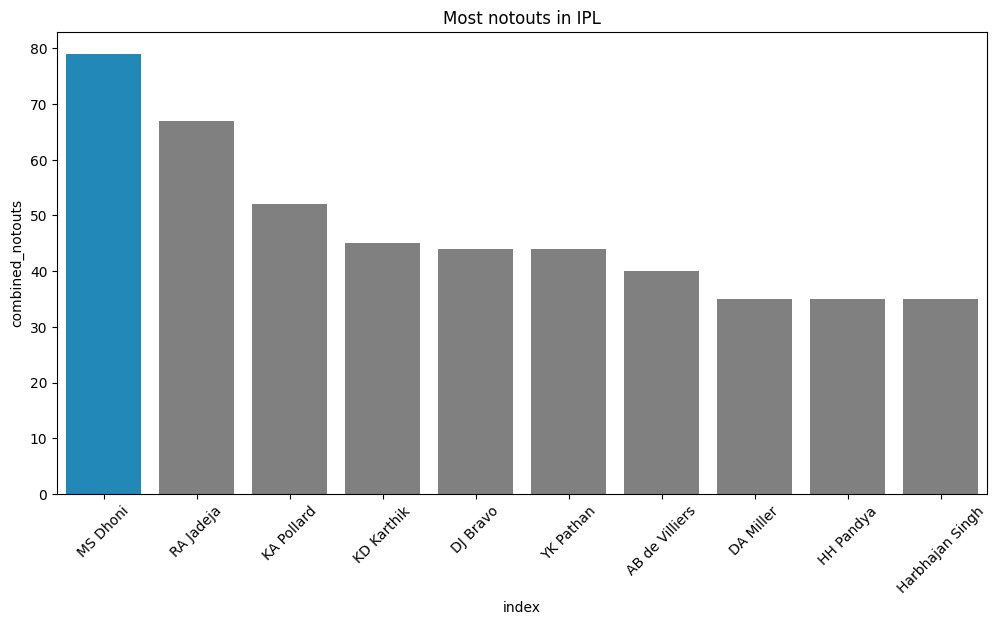

In [34]:
plt.figure(figsize=(12, 6))
cno = batting_stats[required_columns].nlargest(10, 'combined_notouts')
clrs = ['grey' if (val < cno['combined_notouts'].max()) else '#0892d0' for val in cno['combined_notouts'] ]
sns.barplot(data=cno.reset_index(), x='index', y='combined_notouts', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most notouts in IPL');

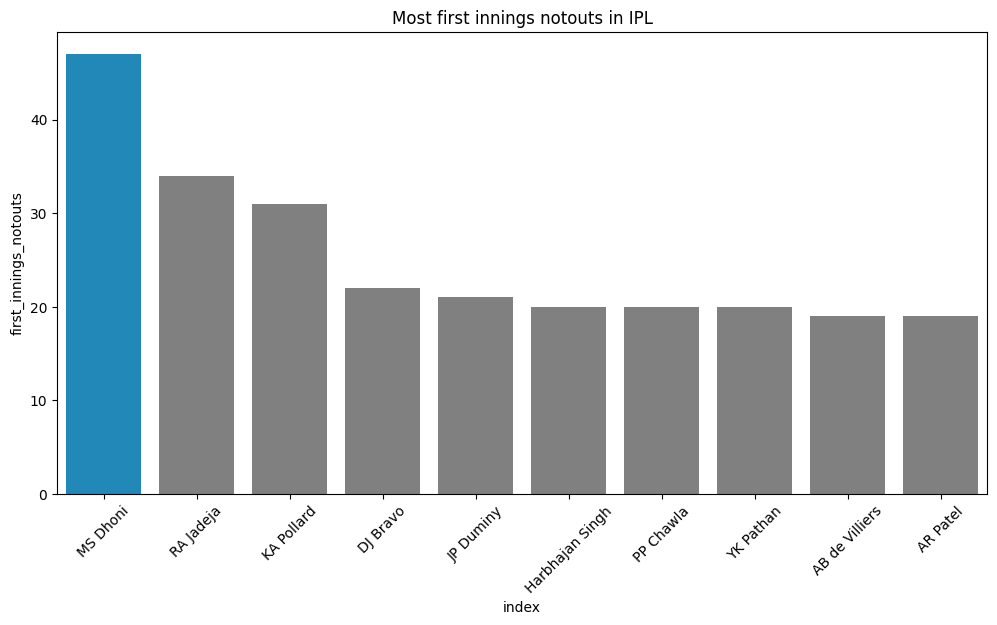

In [35]:
plt.figure(figsize=(12, 6))
cno = batting_stats[required_columns].nlargest(10, 'first_innings_notouts')
clrs = ['grey' if (val < cno['first_innings_notouts'].max()) else '#0892d0' for val in cno['first_innings_notouts'] ]
sns.barplot(data=cno.reset_index(), x='index', y='first_innings_notouts', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most first innings notouts in IPL');

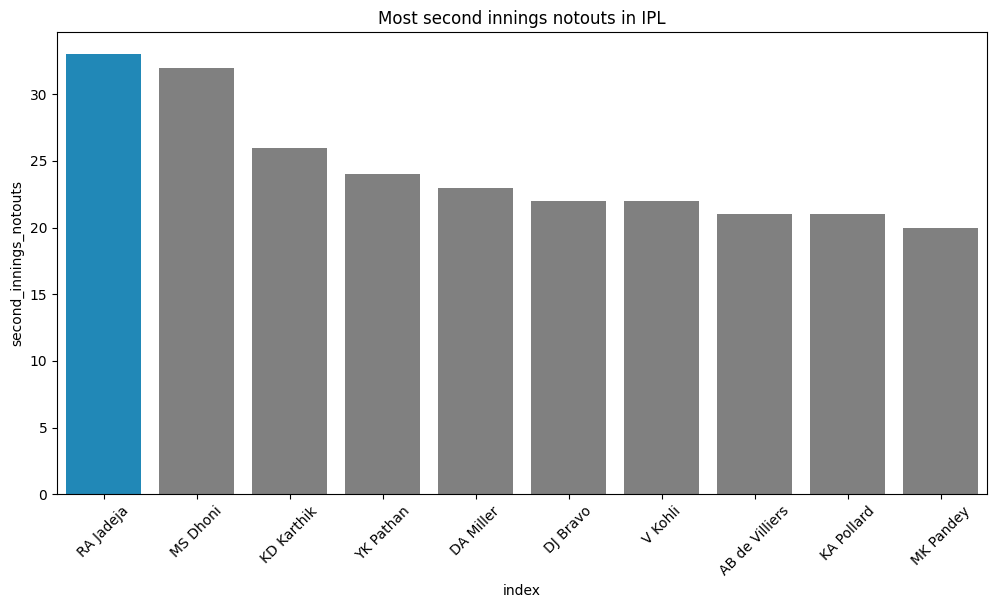

In [36]:
plt.figure(figsize=(12, 6))
cno = batting_stats[required_columns].nlargest(10, 'second_innings_notouts')
clrs = ['grey' if (val < cno['second_innings_notouts'].max()) else '#0892d0' for val in cno['second_innings_notouts'] ]
sns.barplot(data=cno.reset_index(), x='index', y='second_innings_notouts', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most second innings notouts in IPL');

C:\Users\Moham\AppData\Local\Temp\ipykernel_9696\1597189728.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x}%' for x in plt.gca().get_yticks()]);


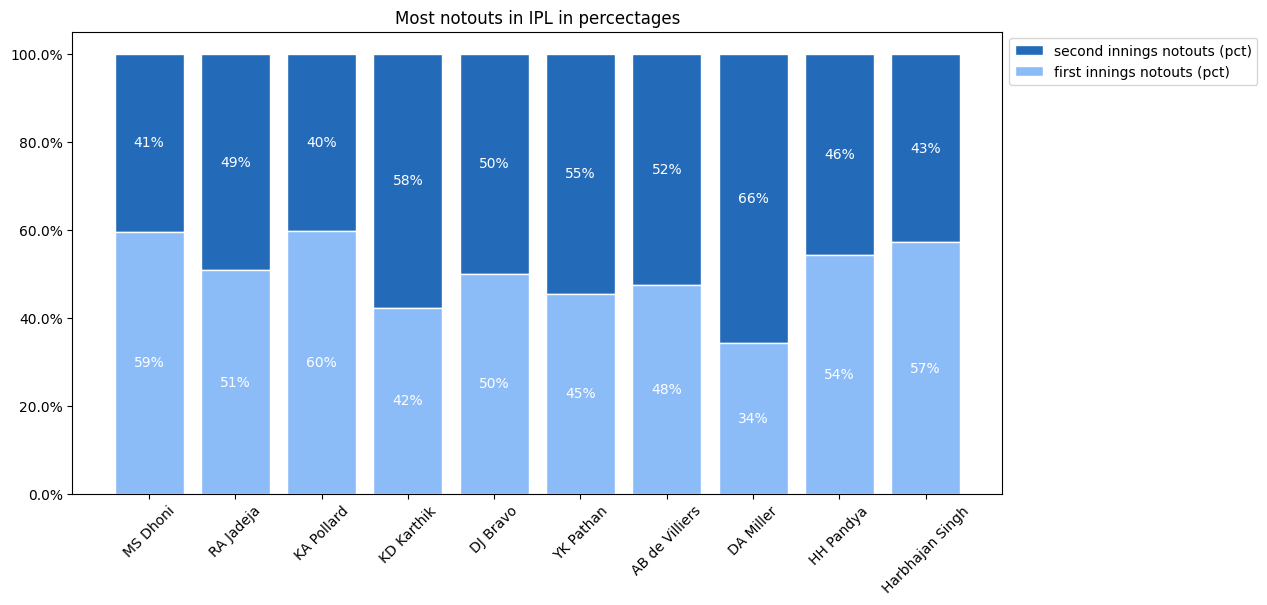

In [37]:
plt.figure(figsize=(12, 6))

cno = batting_stats[required_columns].nlargest(10, 'combined_notouts')
first_innings_notouts =  (cno['first_innings_notouts'] / cno['combined_notouts'] ) * 100
second_innings_notouts =  (cno['second_innings_notouts'] / cno['combined_notouts'] ) * 100
ax2 = plt.bar(cno.index, second_innings_notouts, bottom=first_innings_notouts, color='#236AB9', edgecolor='white', label='second innings notouts (pct)')
ax1 = plt.bar(cno.index, first_innings_notouts, color='#8CBCF8', edgecolor='white', label='first innings notouts (pct)')

# plt.ylim(0, 100)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xticks(rotation=45);
plt.title('Most notouts in IPL in percectages');
for rect in ax1.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{height:.0f}%'
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0:
        plt.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10, color='white')
        
for rect in ax2:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{height:.0f}%'
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0:
        plt.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10, color='white')
plt.gca().set_yticklabels([f'{x}%' for x in plt.gca().get_yticks()]);

In [38]:
batting_stats['innings'].median()

8.0

In [39]:
batting_stats[batting_stats['innings'] <= batting_stats['innings'].quantile(0.50)]

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,...,avg_pp,avg_mo,avg_death,avg_first,avg_second,sr_pp,sr_mo,sr_death,sr_first,sr_second
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,...,0.0,0.0,2.0,2.0,0.00,0.00,0.00,57.14,57.14,0.00
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,...,9.0,12.5,1.0,10.2,2.00,69.23,83.33,50.00,75.00,66.67
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,...,0.0,0.0,25.0,15.0,10.00,0.00,0.00,125.00,125.00,125.00
A Dananjaya,1,0,1,1,5,4,4,0.00,80.00,0.0,...,0.0,0.0,4.0,4.0,0.00,0.00,0.00,80.00,80.00,0.00
A Flintoff,3,0,1,1,53,62,24,31.00,116.98,0.0,...,14.0,23.0,25.0,22.0,20.00,107.69,100.00,147.06,169.23,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y Prithvi Raj,1,0,1,1,1,0,0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
YA Abdulla,1,0,1,1,1,0,0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,...,17.0,6.5,17.0,13.0,11.33,47.22,76.47,130.77,65.00,73.91


In [40]:
# 125 is just a number used by espncricinfo as the minimum balls faced filter
sr = batting_stats[required_columns][batting_stats['balls_faced'] >= 125].nlargest(15, ['strike_rate', 'average'])

In [41]:
sr

,innings,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s,second_innings_notouts,first_innings_notouts,combined_notouts
AD Russell,82,1144,2035,88,30.37,177.88,10.0,0.0,21.0,175.0,137.0,6,9,15
BCJ Cutting,17,141,238,39,21.64,168.79,0.0,0.0,2.0,19.0,15.0,2,4,6
LS Livingstone,23,329,549,70,27.45,166.87,4.0,0.0,3.0,40.0,38.0,3,0,3
JM Sharma,10,143,234,44,29.25,163.64,0.0,0.0,4.0,12.0,22.0,0,2,2
SP Narine,86,630,1025,75,14.86,162.70,4.0,0.0,6.0,63.0,112.0,10,7,17
PBB Rajapaksa,9,129,206,43,22.89,159.69,0.0,0.0,4.0,13.0,16.0,0,0,0
V Sehwag,104,1754,2728,122,27.56,155.53,16.0,2.0,17.0,106.0,334.0,4,1,5
CH Morris,51,398,618,82,22.07,155.28,2.0,0.0,4.0,35.0,41.0,15,8,23
GJ Maxwell,106,1507,2319,95,25.48,153.88,13.0,0.0,19.0,127.0,197.0,10,5,15
PJ Cummins,31,249,379,66,18.95,152.21,3.0,0.0,1.0,26.0,24.0,3,8,11


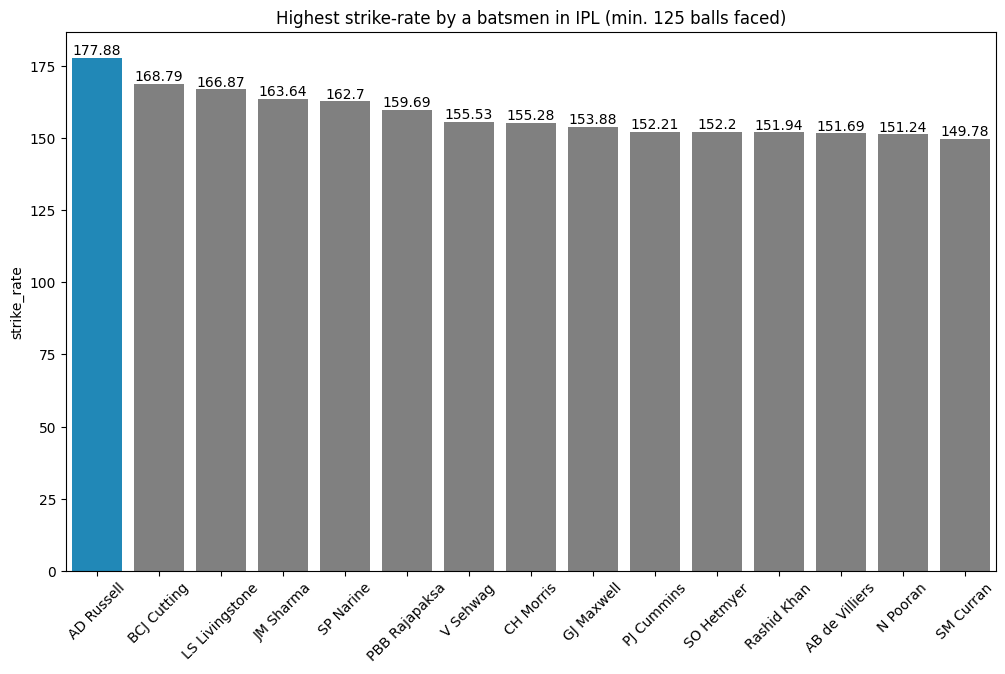

In [42]:
plt.figure(figsize=(12, 7))
clrs = ['grey' if (val < sr['strike_rate'].max()) else '#0892d0' for val in sr['strike_rate'] ]
ax = sns.barplot(data=sr.reset_index(), x='index', y='strike_rate', palette=clrs)
plt.xticks(rotation=45);
plt.title('Highest strike-rate by a batsmen in IPL (min. 125 balls faced)');
ax.bar_label(ax.containers[0]);
plt.xlabel('');

In [43]:
fifties = batting_stats[required_columns].nlargest(10, '50s')

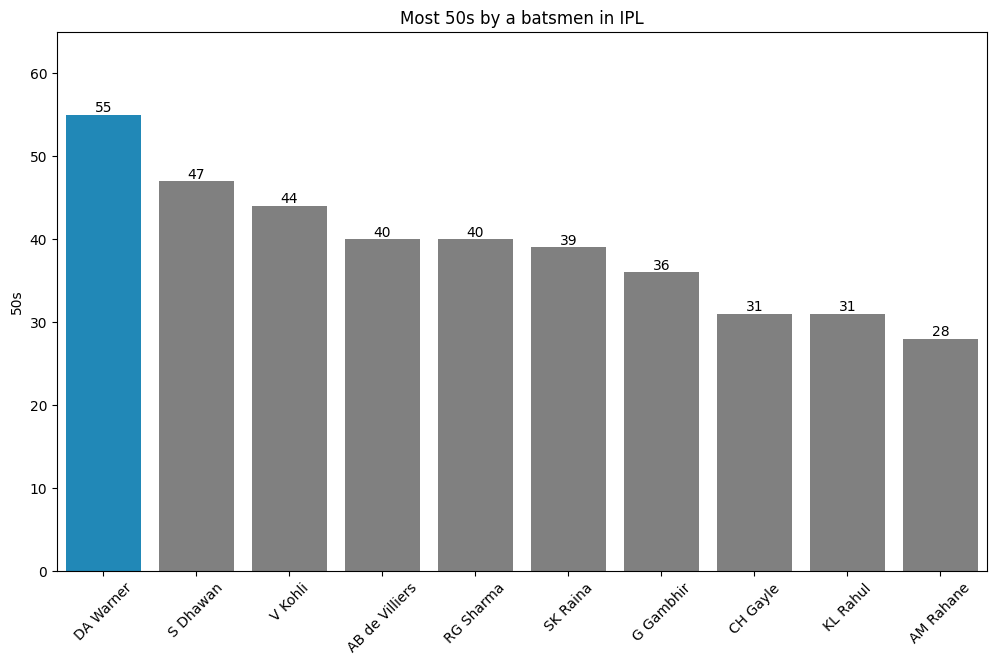

In [44]:
plt.figure(figsize=(12, 7))
clrs = ['grey' if (val < fifties['50s'].max()) else '#0892d0' for val in fifties['50s'] ]
ax = sns.barplot(data=fifties.reset_index(), x='index', y='50s', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most 50s by a batsmen in IPL');
ax.bar_label(ax.containers[0]);
plt.xlabel('');
plt.ylim(0, 65)
plt.savefig("most_fifties_ipl.png");

In [45]:
hundreds = batting_stats[required_columns].nlargest(10, '100s')

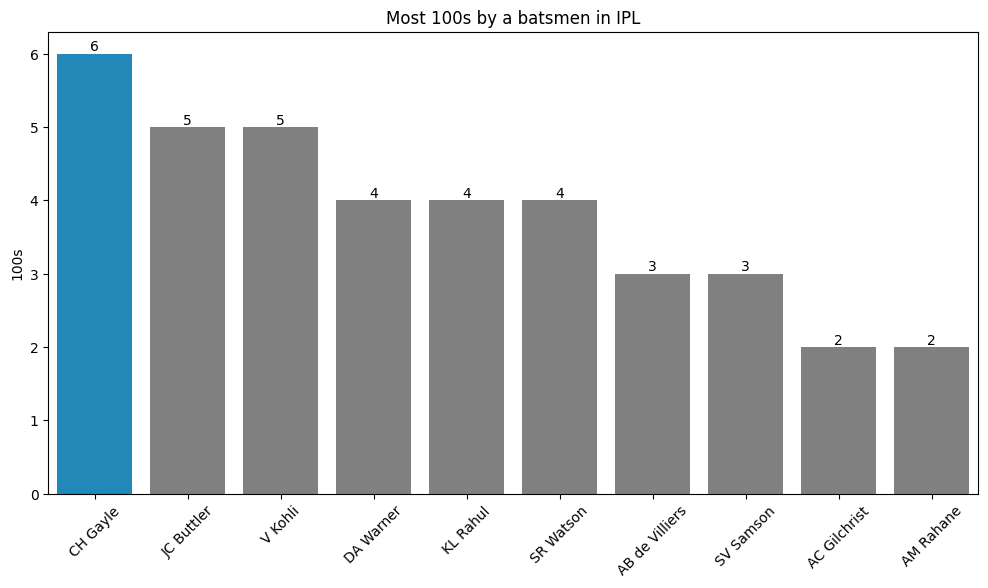

In [46]:
plt.figure(figsize=(12, 6))
clrs = ['grey' if (val < hundreds['100s'].max()) else '#0892d0' for val in hundreds['100s'] ]
ax = sns.barplot(data=hundreds.reset_index(), x='index', y='100s', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most 100s by a batsmen in IPL');
ax.bar_label(ax.containers[0]);
plt.xlabel('');
# plt.ylim(0, 65)

In [47]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
batting_stats[['innings', 'innings_pp', 'average', 'strike_rate', 'avg_pp', 'sr_pp', 'runs_scored_in_pp', 'balls_faced_in_pp', 'notouts_pp']]\
[batting_stats['innings_pp'] >= 10].nlargest(20, 'sr_pp')

,innings,innings_pp,average,strike_rate,avg_pp,sr_pp,runs_scored_in_pp,balls_faced_in_pp,notouts_pp
SP Narine,86,43.0,14.86,162.70,18.47,173.63,665.0,383.0,7.0
LS Livingstone,23,11.0,27.45,166.87,33.50,169.62,134.0,79.0,7.0
JM Bairstow,39,36.0,35.86,142.65,49.64,147.87,695.0,470.0,22.0
PP Shaw,63,63.0,25.21,147.45,28.22,147.39,1129.0,766.0,23.0
E Lewis,26,22.0,27.25,137.11,32.31,146.85,420.0,286.0,9.0
MJ Lumb,12,12.0,23.17,143.30,32.14,146.10,225.0,154.0,5.0
CA Lynn,42,40.0,34.08,140.63,45.82,144.26,779.0,540.0,23.0
V Sehwag,104,103.0,27.56,155.53,26.11,144.16,1593.0,1105.0,42.0
JC Buttler,81,62.0,39.87,149.71,47.27,143.91,1229.0,854.0,36.0
YK Pathan,154,34.0,29.13,142.97,26.38,142.32,343.0,241.0,21.0


In [48]:
batting_stats[['innings', 'innings_pp', 'average', 'strike_rate', 'avg_pp', 'sr_pp', 'runs_scored_in_pp', 'balls_faced_in_pp', 'notouts_pp']]\
[batting_stats['innings_pp'] >= 10]['balls_faced_in_pp'].median()

387.0

In [49]:
34/154

0.22077922077922077

In [50]:
batting_stats[['innings', 'innings_pp', 'average', 'strike_rate', 'avg_pp', 'sr_pp', 'runs_scored_in_pp', 'balls_faced_in_pp', 'notouts_pp']]\
[batting_stats['innings_pp'] >= 14].nlargest(50, ['sr_pp', 'avg_pp'])

,innings,innings_pp,average,strike_rate,avg_pp,sr_pp,runs_scored_in_pp,balls_faced_in_pp,notouts_pp
SP Narine,86,43.0,14.86,162.70,18.47,173.63,665.0,383.0,7.0
JM Bairstow,39,36.0,35.86,142.65,49.64,147.87,695.0,470.0,22.0
PP Shaw,63,63.0,25.21,147.45,28.22,147.39,1129.0,766.0,23.0
E Lewis,26,22.0,27.25,137.11,32.31,146.85,420.0,286.0,9.0
CA Lynn,42,40.0,34.08,140.63,45.82,144.26,779.0,540.0,23.0
V Sehwag,104,103.0,27.56,155.53,26.11,144.16,1593.0,1105.0,42.0
JC Buttler,81,62.0,39.87,149.71,47.27,143.91,1229.0,854.0,36.0
YK Pathan,154,34.0,29.13,142.97,26.38,142.32,343.0,241.0,21.0
RA Tripathi,74,52.0,27.66,140.80,32.46,141.89,779.0,549.0,28.0
SA Yadav,108,53.0,30.05,136.78,51.93,140.89,727.0,516.0,39.0


In [51]:
batting_stats[['innings', 'innings_pp', 'average', 'strike_rate', 'avg_pp', 'sr_pp', 'runs_scored_in_pp', 'balls_faced_in_pp', 'notouts_pp']]\
[batting_stats['innings_pp'] >=50].nlargest(50, ['sr_pp', 'avg_pp'])

,innings,innings_pp,average,strike_rate,avg_pp,sr_pp,runs_scored_in_pp,balls_faced_in_pp,notouts_pp
PP Shaw,63,63.0,25.21,147.45,28.22,147.39,1129.0,766.0,23.0
V Sehwag,104,103.0,27.56,155.53,26.11,144.16,1593.0,1105.0,42.0
JC Buttler,81,62.0,39.87,149.71,47.27,143.91,1229.0,854.0,36.0
RA Tripathi,74,52.0,27.66,140.80,32.46,141.89,779.0,549.0,28.0
SA Yadav,108,53.0,30.05,136.78,51.93,140.89,727.0,516.0,39.0
DA Warner,162,154.0,42.01,140.69,44.49,137.32,2892.0,2106.0,89.0
CH Gayle,141,136.0,39.72,148.96,37.08,134.75,2373.0,1761.0,72.0
AC Gilchrist,80,80.0,27.22,138.39,28.85,134.08,1385.0,1033.0,32.0
WP Saha,119,67.0,25.28,127.87,27.77,133.70,972.0,727.0,32.0
SK Raina,200,137.0,32.52,136.73,35.27,132.88,1552.0,1168.0,93.0


In [52]:
batting_stats[['innings', 'innings_death', 'average', 'strike_rate', 'avg_death', 'sr_death', 'runs_scored_in_death', 'balls_faced_in_death', 'notouts_death']]\
[batting_stats['balls_faced_in_death'] > 49].nlargest(50, ['sr_death', 'avg_death'])

,innings,innings_death,average,strike_rate,avg_death,sr_death,runs_scored_in_death,balls_faced_in_death,notouts_death
HM Amla,16,3.0,44.38,141.77,61.00,234.62,122.0,52.0,1.0
TH David,9,7.0,31.17,210.11,29.60,227.69,148.0,65.0,2.0
AB de Villiers,170,81.0,39.71,151.69,44.48,222.91,1868.0,838.0,39.0
MA Agarwal,107,13.0,22.59,134.28,21.55,213.51,237.0,111.0,2.0
R Powell,12,7.0,25.00,149.70,26.80,212.70,134.0,63.0,2.0
LS Livingstone,23,9.0,27.45,166.87,15.71,211.54,110.0,52.0,2.0
Q de Kock,92,10.0,32.14,133.91,27.83,206.17,167.0,81.0,4.0
CH Gayle,141,28.0,39.72,148.96,36.31,204.58,581.0,284.0,12.0
RR Pant,97,48.0,34.61,147.97,23.94,200.00,790.0,395.0,15.0
CR Brathwaite,14,10.0,13.92,163.06,17.44,198.73,157.0,79.0,1.0


In [53]:
batting_stats[['innings', 'innings_first', 'average', 'strike_rate', 'balls_faced', 'avg_first', 'sr_first', 'runs_scored_in_first_innings', 'balls_faced_in_first_innings', 'notouts_first']]\
[batting_stats['innings_first'] > 8].nlargest(50, ['sr_first', 'avg_first'])

,innings,innings_first,average,strike_rate,balls_faced,avg_first,sr_first,runs_scored_in_first_innings,balls_faced_in_first_innings,notouts_first
AD Russell,82,39.0,30.37,177.88,1144,34.97,182.75,1049.0,574.0,9.0
MS Gony,17,9.0,9.90,139.44,71,13.60,178.95,68.0,38.0,4.0
CR Brathwaite,14,10.0,13.92,163.06,111,16.33,177.11,147.0,83.0,1.0
BCJ Cutting,17,11.0,21.64,168.79,141,20.71,174.70,145.0,83.0,4.0
C de Grandhomme,21,10.0,18.94,134.67,225,16.62,170.51,133.0,78.0,2.0
LS Livingstone,23,13.0,27.45,166.87,329,28.23,165.32,367.0,222.0,0.0
SN Khan,33,17.0,24.18,137.82,386,46.75,162.61,374.0,230.0,9.0
AB de Villiers,170,88.0,39.71,151.69,3403,45.84,161.96,3163.0,1953.0,19.0
JC Archer,23,9.0,15.00,157.26,124,16.00,156.86,80.0,51.0,4.0
SP Narine,86,39.0,14.86,162.70,630,13.31,155.47,426.0,274.0,7.0


In [54]:
batting_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s,runs_scored_in_pp,balls_faced_in_pp,innings_pp,notouts_pp,runs_scored_in_mo,balls_faced_in_mo,innings_mo,notouts_mo,runs_scored_in_death,balls_faced_in_death,innings_death,notouts_death,runs_scored_in_first_innings,balls_faced_in_first_innings,innings_first,notouts_first,runs_scored_in_second_innings,balls_faced_in_second_innings,innings_second,notouts_second,avg_pp,avg_mo,avg_death,avg_first,avg_second,sr_pp,sr_mo,sr_death,sr_first,sr_second
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,0.0,2.0,15.0,16.0,5.0,6.0,1.0,0.0,61.0,41.0,5.0,0.0,214.0,146.0,22.0,8.0,166.0,113.0,13.0,6.0,114.0,80.0,10.0,2.0,5.00,12.20,15.29,23.71,14.25,83.33,148.78,146.58,146.90,142.50
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,0.0,0.0,7.0,11.0,1.0,6.0,2.0,1.0,59.0,58.0,6.0,3.0,101.0,66.0,7.0,3.0,106.0,86.0,5.0,1.0,55.0,44.0,6.0,2.0,1.00,19.67,25.25,26.50,13.75,16.67,101.72,153.03,123.26,125.00
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,2.0,0.0,4.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,2.00,0.00,0.00,0.00,57.14,57.14,0.00
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,0.0,0.0,0.0,7.0,27.0,39.0,5.0,2.0,25.0,30.0,3.0,1.0,1.0,2.0,1.0,0.0,51.0,68.0,5.0,0.0,2.0,3.0,1.0,0.0,9.00,12.50,1.00,10.20,2.00,69.23,83.33,50.00,75.00,66.67
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,20.0,3.0,2.0,15.0,12.0,1.0,0.0,10.0,8.0,2.0,1.0,0.00,0.00,25.00,15.00,10.00,0.00,0.00,125.00,125.00,125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,0.0,0.0,0.0,5.0,17.0,36.0,2.0,1.0,13.0,17.0,3.0,1.0,17.0,13.0,1.0,0.0,13.0,20.0,1.0,0.0,34.0,46.0,3.0,0.0,17.00,6.50,17.00,13.00,11.33,47.22,76.47,130.77,65.00,73.91
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,0.0,0.0,0.0,0.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,1.0,0.0,3.00,0.00,0.00,0.00,3.00,42.86,0.00,0.00,0.00,42.86
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,0.0,23.0,149.0,217.0,189.0,184.0,33.0,21.0,1655.0,1435.0,109.0,52.0,906.0,501.0,56.0,14.0,1510.0,1091.0,66.0,5.0,1240.0,1029.0,60.0,10.0,15.75,29.04,21.57,24.75,24.80,102.72,115.33,180.84,138.41,120.51


In [55]:
ipl_ball_by_ball = pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")

In [56]:
ipl_ball_by_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [57]:
y = ipl_ball_by_ball[ipl_ball_by_ball['innings'].isin([1])].groupby(['ID', 'batter'])['batsman_run'].sum().droplevel(0).sort_values()

In [58]:
fifties_first_innings = y[(y >= 50) & (y<100)].reset_index()['batter'].value_counts().rename('50s_in_first_innings')

In [59]:
hundreds_first_innings = y[(y >= 100)].reset_index()['batter'].value_counts().rename('100s_in_first_innings')

In [60]:
batting_stats = batting_stats.merge(fifties_first_innings, left_index=True, right_index=True, how='outer')
batting_stats = batting_stats.merge(hundreds_first_innings, left_index=True, right_index=True, how='outer')

In [61]:
y = ipl_ball_by_ball[ipl_ball_by_ball['innings'].isin([2])].groupby(['ID', 'batter'])['batsman_run'].sum().droplevel(0).sort_values()

In [62]:
fifties_second_innings = y[(y >= 50) & (y<100)].reset_index()['batter'].value_counts().rename('50s_in_second_innings')

In [63]:
hundreds_second_innings = y[(y >= 100)].reset_index()['batter'].value_counts().rename('100s_in_second_innings')

In [64]:
batting_stats = batting_stats.merge(fifties_second_innings, left_index=True, right_index=True, how='outer')
batting_stats = batting_stats.merge(hundreds_second_innings, left_index=True, right_index=True, how='outer')

In [65]:
batting_stats = batting_stats.fillna(0)

In [66]:
batting_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s,runs_scored_in_pp,balls_faced_in_pp,innings_pp,notouts_pp,runs_scored_in_mo,balls_faced_in_mo,innings_mo,notouts_mo,runs_scored_in_death,balls_faced_in_death,innings_death,notouts_death,runs_scored_in_first_innings,balls_faced_in_first_innings,innings_first,notouts_first,runs_scored_in_second_innings,balls_faced_in_second_innings,innings_second,notouts_second,avg_pp,avg_mo,avg_death,avg_first,avg_second,sr_pp,sr_mo,sr_death,sr_first,sr_second,50s_in_first_innings,100s_in_first_innings,50s_in_second_innings,100s_in_second_innings
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,0.0,2.0,15.0,16.0,5.0,6.0,1.0,0.0,61.0,41.0,5.0,0.0,214.0,146.0,22.0,8.0,166.0,113.0,13.0,6.0,114.0,80.0,10.0,2.0,5.00,12.20,15.29,23.71,14.25,83.33,148.78,146.58,146.90,142.50,0.0,0.0,0.0,0.0
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,0.0,0.0,7.0,11.0,1.0,6.0,2.0,1.0,59.0,58.0,6.0,3.0,101.0,66.0,7.0,3.0,106.0,86.0,5.0,1.0,55.0,44.0,6.0,2.0,1.00,19.67,25.25,26.50,13.75,16.67,101.72,153.03,123.26,125.00,1.0,0.0,0.0,0.0
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,2.0,0.0,4.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,2.00,0.00,0.00,0.00,57.14,57.14,0.00,0.0,0.0,0.0,0.0
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,0.0,0.0,0.0,7.0,27.0,39.0,5.0,2.0,25.0,30.0,3.0,1.0,1.0,2.0,1.0,0.0,51.0,68.0,5.0,0.0,2.0,3.0,1.0,0.0,9.00,12.50,1.00,10.20,2.00,69.23,83.33,50.00,75.00,66.67,0.0,0.0,0.0,0.0
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,20.0,3.0,2.0,15.0,12.0,1.0,0.0,10.0,8.0,2.0,1.0,0.00,0.00,25.00,15.00,10.00,0.00,0.00,125.00,125.00,125.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,0.0,0.0,0.0,5.0,17.0,36.0,2.0,1.0,13.0,17.0,3.0,1.0,17.0,13.0,1.0,0.0,13.0,20.0,1.0,0.0,34.0,46.0,3.0,0.0,17.00,6.50,17.00,13.00,11.33,47.22,76.47,130.77,65.00,73.91,0.0,0.0,0.0,0.0
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,0.0,0.0,0.0,0.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,1.0,0.0,3.00,0.00,0.00,0.00,3.00,42.86,0.00,0.00,0.00,42.86,0.0,0.0,0.0,0.0
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,0.0,23.0,149.0,217.0,189.0,184.0,33.0,21.0,1655.0,1435.0,109.0,52.0,906.0,501.0,56.0,14.0,1510.0,1091.0,66.0,5.0,1240.0,1029.0,60.0,10.0,15.75,29.04,21.57,24.75,24.80,102.72,115.33,180.84,138.41,120.51,8.0,0.0,5.0,0.0


In [67]:
fifties_first_innings = batting_stats.nlargest(10, '50s_in_first_innings')

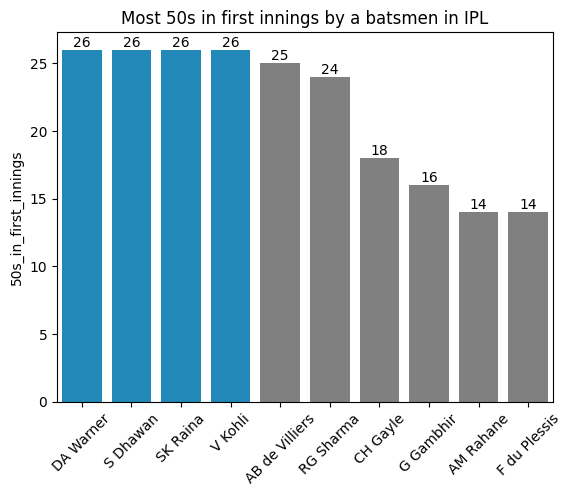

In [68]:
# plt.figure(figsize=(12, 7))
clrs = ['grey' if (val < fifties_first_innings['50s_in_first_innings'].max()) else '#0892d0' for val in fifties_first_innings['50s_in_first_innings'] ]
ax = sns.barplot(data=fifties_first_innings.reset_index(), x='index', y='50s_in_first_innings', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most 50s in first innings by a batsmen in IPL');
ax.bar_label(ax.containers[0]);
plt.xlabel('');
# plt.ylim(0, 65)
# plt.savefig("most_fifties_ipl.png");

In [69]:
fifties_second_innings = batting_stats.nlargest(10, '50s_in_second_innings')

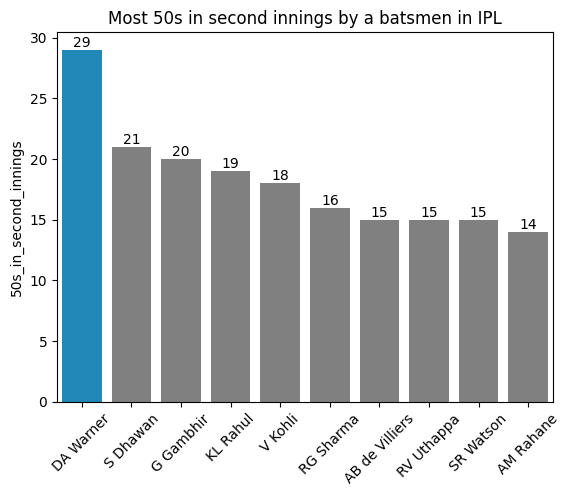

In [70]:
# plt.figure(figsize=(12, 7))
clrs = ['grey' if (val < fifties_second_innings['50s_in_second_innings'].max()) else '#0892d0' for val in fifties_second_innings['50s_in_second_innings'] ]
ax = sns.barplot(data=fifties_second_innings.reset_index(), x='index', y='50s_in_second_innings', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most 50s in second innings by a batsmen in IPL');
ax.bar_label(ax.containers[0]);
plt.xlabel('');

In [71]:
29 + 26

55

In [72]:
hundreds_first_innings = batting_stats.nlargest(10, ['100s_in_first_innings', 'sr_first'])

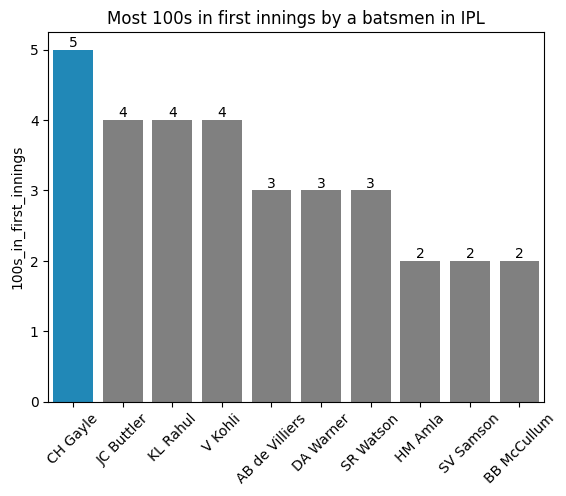

In [73]:
# plt.figure(figsize=(12, 7))
clrs = ['grey' if (val < hundreds_first_innings['100s_in_first_innings'].max()) else '#0892d0' for val in hundreds_first_innings['100s_in_first_innings'] ]
ax = sns.barplot(data=hundreds_first_innings.reset_index(), x='index', y='100s_in_first_innings', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most 100s in first innings by a batsmen in IPL');
ax.bar_label(ax.containers[0]);
plt.xlabel('');

In [74]:
hundreds_second_innings = batting_stats.nlargest(10, ['100s_in_second_innings', 'sr_first'])

(0.0, 4.0)

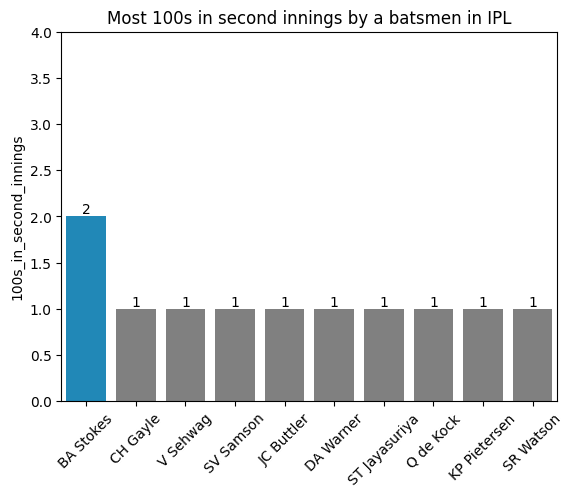

In [75]:
# plt.figure(figsize=(12, 7))
clrs = ['grey' if (val < hundreds_second_innings['100s_in_second_innings'].max()) else '#0892d0' for val in hundreds_second_innings['100s_in_second_innings'] ]
ax = sns.barplot(data=hundreds_second_innings.reset_index(), x='index', y='100s_in_second_innings', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most 100s in second innings by a batsmen in IPL');
ax.bar_label(ax.containers[0]);
plt.xlabel('');
plt.ylim(0, 4)

In [76]:
batting_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s,runs_scored_in_pp,balls_faced_in_pp,innings_pp,notouts_pp,runs_scored_in_mo,balls_faced_in_mo,innings_mo,notouts_mo,runs_scored_in_death,balls_faced_in_death,innings_death,notouts_death,runs_scored_in_first_innings,balls_faced_in_first_innings,innings_first,notouts_first,runs_scored_in_second_innings,balls_faced_in_second_innings,innings_second,notouts_second,avg_pp,avg_mo,avg_death,avg_first,avg_second,sr_pp,sr_mo,sr_death,sr_first,sr_second,50s_in_first_innings,100s_in_first_innings,50s_in_second_innings,100s_in_second_innings
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,0.0,2.0,15.0,16.0,5.0,6.0,1.0,0.0,61.0,41.0,5.0,0.0,214.0,146.0,22.0,8.0,166.0,113.0,13.0,6.0,114.0,80.0,10.0,2.0,5.00,12.20,15.29,23.71,14.25,83.33,148.78,146.58,146.90,142.50,0.0,0.0,0.0,0.0
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,0.0,0.0,7.0,11.0,1.0,6.0,2.0,1.0,59.0,58.0,6.0,3.0,101.0,66.0,7.0,3.0,106.0,86.0,5.0,1.0,55.0,44.0,6.0,2.0,1.00,19.67,25.25,26.50,13.75,16.67,101.72,153.03,123.26,125.00,1.0,0.0,0.0,0.0
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,2.0,0.0,4.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,2.00,0.00,0.00,0.00,57.14,57.14,0.00,0.0,0.0,0.0,0.0
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,0.0,0.0,0.0,7.0,27.0,39.0,5.0,2.0,25.0,30.0,3.0,1.0,1.0,2.0,1.0,0.0,51.0,68.0,5.0,0.0,2.0,3.0,1.0,0.0,9.00,12.50,1.00,10.20,2.00,69.23,83.33,50.00,75.00,66.67,0.0,0.0,0.0,0.0
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,20.0,3.0,2.0,15.0,12.0,1.0,0.0,10.0,8.0,2.0,1.0,0.00,0.00,25.00,15.00,10.00,0.00,0.00,125.00,125.00,125.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,0.0,0.0,0.0,5.0,17.0,36.0,2.0,1.0,13.0,17.0,3.0,1.0,17.0,13.0,1.0,0.0,13.0,20.0,1.0,0.0,34.0,46.0,3.0,0.0,17.00,6.50,17.00,13.00,11.33,47.22,76.47,130.77,65.00,73.91,0.0,0.0,0.0,0.0
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,0.0,0.0,0.0,0.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,1.0,0.0,3.00,0.00,0.00,0.00,3.00,42.86,0.00,0.00,0.00,42.86,0.0,0.0,0.0,0.0
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,0.0,23.0,149.0,217.0,189.0,184.0,33.0,21.0,1655.0,1435.0,109.0,52.0,906.0,501.0,56.0,14.0,1510.0,1091.0,66.0,5.0,1240.0,1029.0,60.0,10.0,15.75,29.04,21.57,24.75,24.80,102.72,115.33,180.84,138.41,120.51,8.0,0.0,5.0,0.0


In [77]:
fours = batting_stats.nlargest(10, '4s')[['4s']].astype(int)

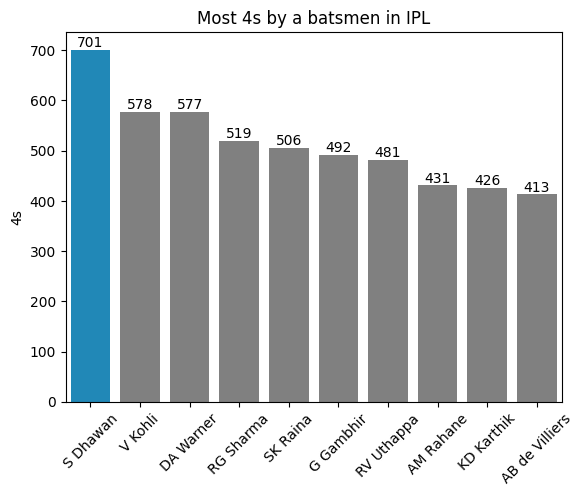

In [78]:
clrs = ['grey' if (val < fours['4s'].max()) else '#0892d0' for val in fours['4s'] ]
ax = sns.barplot(data=fours.reset_index(), x='index', y='4s', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most 4s by a batsmen in IPL');
ax.bar_label(ax.containers[0]);
plt.xlabel('');

In [79]:
sixes = batting_stats.nlargest(10, '6s')[['6s']].astype(int)

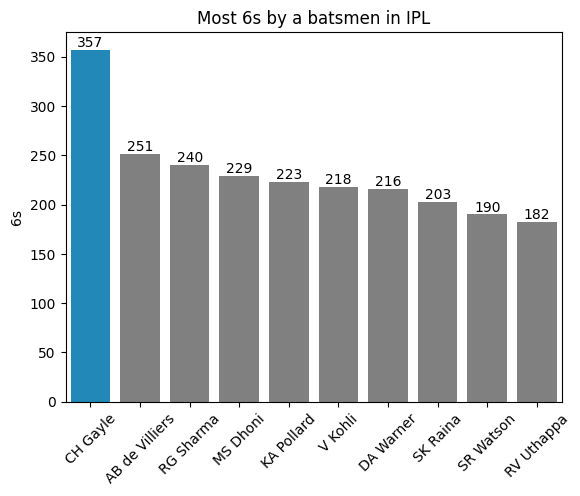

In [80]:
clrs = ['grey' if (val < sixes['6s'].max()) else '#0892d0' for val in sixes['6s'] ]
ax = sns.barplot(data=sixes.reset_index(), x='index', y='6s', palette=clrs)
plt.xticks(rotation=45);
plt.title('Most 6s by a batsmen in IPL');
ax.bar_label(ax.containers[0]);
plt.xlabel('');

In [81]:
thirties = batting_stats.nlargest(50, '30s')[['innings','average', '30s']]

In [82]:
thirties

,innings,average,30s
V Kohli,215,36.20,47.0
RV Uthappa,197,27.51,45.0
RG Sharma,222,30.30,43.0
KD Karthik,208,26.85,40.0
MS Dhoni,206,39.20,40.0
S Dhawan,205,34.88,39.0
AT Rayudu,175,28.90,37.0
SK Raina,200,32.52,37.0
BB McCullum,109,27.69,29.0
RR Pant,97,34.61,28.0


In [83]:
name = "SA Yadav"

In [84]:
batting_stats.loc[name]

innings                           108.00
second_innings_notouts             10.00
first_innings_notouts              10.00
combined_notouts                   20.00
balls_faced                      1933.00
total_runs                       2644.00
highest_score                      82.00
average                            30.05
strike_rate                       136.78
50s                                16.00
100s                                0.00
30s                                22.00
6s                                 84.00
4s                                284.00
runs_scored_in_pp                 727.00
balls_faced_in_pp                 516.00
innings_pp                         53.00
notouts_pp                         39.00
runs_scored_in_mo                1369.00
balls_faced_in_mo                1090.00
innings_mo                         81.00
notouts_mo                         36.00
runs_scored_in_death              548.00
balls_faced_in_death              327.00
innings_death   

In [85]:
combined_milestones = batting_stats['30s'] + batting_stats['50s'] + batting_stats['100s']

In [86]:
combined_milestones = pd.merge(combined_milestones.rename('combined_milestones'), batting_stats['innings'], how='inner', left_index=True, right_index=True)

In [87]:
combined_milestones['pct_of_milestones'] = np.round(((combined_milestones['combined_milestones'] / combined_milestones['innings']) * 100), 2)

In [88]:
combined_milestones[combined_milestones['innings'] >= 8].nlargest(5, 'pct_of_milestones')

,combined_milestones,innings,pct_of_milestones
LMP Simmons,17.0,29,58.62
RM Patidar,6.0,11,54.55
SE Marsh,37.0,69,53.62
ML Hayden,17.0,32,53.12
DA Warner,86.0,162,53.09


In [89]:
combined_milestones['adj_pct_of_milestones'] = ((combined_milestones['innings'] * combined_milestones['pct_of_milestones']) / combined_milestones['innings'].sum()).round(2) * 100

In [90]:
# combined_milestones = combined_milestones[['innings', 'combined_milestones', 'pct_of_milestones', 'adj_pct_of_milestones']]

In [91]:
# combined_milestones.nlargest(50, 'adj_pct_of_milestones')

In [92]:
top_combined_milestones = combined_milestones.nlargest(10, 'adj_pct_of_milestones')[['adj_pct_of_milestones']].astype(int)

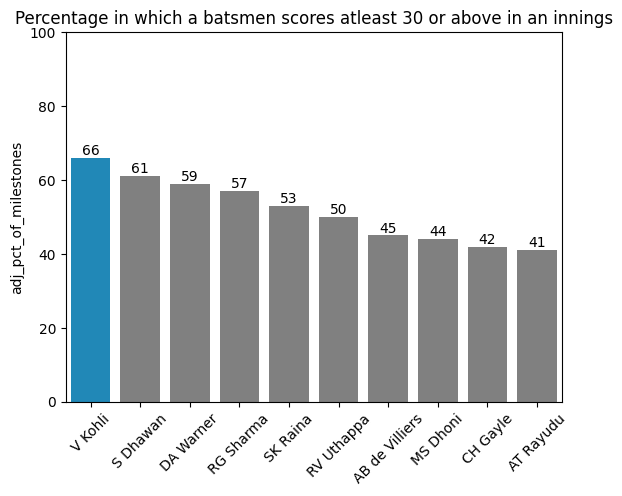

In [93]:
clrs = ['grey' if (val < top_combined_milestones['adj_pct_of_milestones'].max()) else '#0892d0' for val in top_combined_milestones['adj_pct_of_milestones'] ]
ax = sns.barplot(data=top_combined_milestones.reset_index(), x='index', y='adj_pct_of_milestones', palette=clrs)
plt.xticks(rotation=45);
plt.title('Percentage in which a batsmen scores atleast 30 or above in an innings');
ax.bar_label(ax.containers[0]);
plt.ylim(0, 100)
plt.xlabel('');

In [94]:
bowling_stats[bowling_stats['bowl_innings'] >= 9].nsmallest(10, 'economy')

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,5w,0w,pct_of_getting_wicket_each_match,runs_given_in_pp,balls_bowled_in_pp,wickets_taken_in_pp,runs_given_in_mo,balls_bowled_in_mo,wickets_taken_in_mo,runs_given_in_death,balls_bowled_in_death,wickets_taken_in_death,economy_in_pp,economy_in_mo,economy_in_death,bowl_avg_in_pp,bowl_avg_in_mo,bowl_avg_in_death,bowl_sr_in_pp,bowl_sr_in_mo,bowl_sr_in_death,runs_given_in_first_innings,balls_bowled_in_first_innings,wickets_taken_in_first_innings,runs_given_in_second_innings,balls_bowled_in_second_innings,wickets_taken_in_second_innings,economy_in_first_innings,economy_in_second_innings,bowl_avg_in_first_innings,bowl_avg_in_second_innings,bowl_sr_in_first_innings,bowl_sr_in_second_innings
Mohsin Khan,9,198,197,14,5.97,14.07,14.14,4/16,2,1,0,2,77.78,84,96,6,44,54,3,69,48,5,5.25,4.89,8.62,14.00,14.67,13.80,16.00,18.00,9.60,86,72,2,111,126,12,7.17,5.29,43.00,9.25,36.00,10.50
A Chandila,12,234,242,11,6.21,22.00,21.27,4/13,0,1,0,6,50.00,137,144,10,99,84,1,6,6,0,5.71,7.07,6.00,13.70,99.00,0.00,14.40,84.00,0.00,142,120,3,100,114,8,7.10,5.26,47.33,12.50,40.00,14.25
Rashid Khan,92,2195,2333,112,6.38,20.83,19.60,4/24,11,1,0,20,78.26,242,192,9,1623,1625,79,468,378,24,7.56,5.99,7.43,26.89,20.54,19.50,21.33,20.57,15.75,1243,1152,53,1090,1043,59,6.47,6.27,23.45,18.47,21.74,17.68
Sohail Tanvir,11,247,266,22,6.46,12.09,11.23,6/14,3,1,0,4,63.64,141,132,6,8,12,0,117,103,16,6.41,4.00,6.82,23.50,0.00,7.31,22.00,0.00,6.44,164,144,14,102,103,8,6.83,5.94,11.71,12.75,10.29,12.88
SM Pollock,13,276,301,11,6.54,27.36,25.09,3/12,1,0,0,6,53.85,209,204,8,84,66,3,8,6,0,6.15,7.64,8.00,26.12,28.00,0.00,25.50,22.00,0.00,176,174,9,125,102,2,6.07,7.35,19.56,62.50,19.33,51.00
A Kumble,42,965,1058,45,6.58,23.51,21.44,5/5,2,2,1,17,59.52,88,108,3,758,690,25,212,167,17,4.89,6.59,7.62,29.33,30.32,12.47,36.00,27.60,9.82,646,578,27,412,387,18,6.71,6.39,23.93,22.89,21.41,21.50
GD McGrath,14,324,357,12,6.61,29.75,27.00,4/29,0,1,0,7,50.00,211,222,8,28,24,1,118,78,3,5.70,7.00,9.08,26.38,28.00,39.33,27.75,24.00,26.00,204,192,4,153,132,8,6.38,6.95,51.00,19.12,48.00,16.50
SP Narine,147,3457,3820,152,6.63,25.13,22.74,5/19,6,7,1,56,61.90,915,834,24,1741,1674,61,1164,949,67,6.58,6.24,7.36,38.12,28.54,17.37,34.75,27.44,14.16,2346,2074,87,1474,1383,65,6.79,6.39,26.97,22.68,23.84,21.28
M Muralitharan,66,1524,1696,63,6.68,26.92,24.19,3/11,5,0,0,24,63.64,149,144,2,1174,1105,39,373,275,22,6.21,6.37,8.14,74.50,30.10,16.95,72.00,28.33,12.50,722,642,21,974,882,42,6.75,6.63,34.38,23.19,30.57,21.00
RE van der Merwe,21,443,498,21,6.74,23.71,21.10,3/20,1,0,0,5,76.19,56,36,3,317,312,11,125,95,7,9.33,6.10,7.89,18.67,28.82,17.86,12.00,28.36,13.57,280,240,10,218,203,11,7.00,6.44,28.00,19.82,24.00,18.45


In [95]:
# Percentage of getting atleast a wicket in a match
bowling_stats[bowling_stats['bowl_innings'] >= 20].nlargest(10, 'pct_of_getting_wicket_each_match')

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,5w,0w,pct_of_getting_wicket_each_match,runs_given_in_pp,balls_bowled_in_pp,wickets_taken_in_pp,runs_given_in_mo,balls_bowled_in_mo,wickets_taken_in_mo,runs_given_in_death,balls_bowled_in_death,wickets_taken_in_death,economy_in_pp,economy_in_mo,economy_in_death,bowl_avg_in_pp,bowl_avg_in_mo,bowl_avg_in_death,bowl_sr_in_pp,bowl_sr_in_mo,bowl_sr_in_death,runs_given_in_first_innings,balls_bowled_in_first_innings,wickets_taken_in_first_innings,runs_given_in_second_innings,balls_bowled_in_second_innings,wickets_taken_in_second_innings,economy_in_first_innings,economy_in_second_innings,bowl_avg_in_first_innings,bowl_avg_in_second_innings,bowl_sr_in_first_innings,bowl_sr_in_second_innings
A Nortje,30,682,916,43,8.06,21.30,15.86,3/33,3,0,0,5,83.33,379,306,15,181,122,9,356,254,19,7.43,8.90,8.41,25.27,20.11,18.74,20.40,13.56,13.37,380,264,18,536,418,25,8.64,7.69,21.11,21.44,14.67,16.72
CR Woakes,21,440,658,30,8.97,21.93,14.67,3/6,3,0,0,4,80.95,242,162,6,133,120,8,283,158,16,8.96,6.65,10.75,40.33,16.62,17.69,27.00,15.00,9.88,473,296,15,185,144,15,9.59,7.71,31.53,12.33,19.73,9.60
K Rabada,63,1429,1965,99,8.25,19.85,14.43,4/21,5,6,0,12,80.95,756,576,22,412,349,20,797,504,57,7.88,7.08,9.49,34.36,20.60,13.98,26.18,17.45,8.84,994,684,45,971,745,54,8.72,7.82,22.09,17.98,15.20,13.80
Rashid Khan,92,2195,2333,112,6.38,20.83,19.60,4/24,11,1,0,20,78.26,242,192,9,1623,1625,79,468,378,24,7.56,5.99,7.43,26.89,20.54,19.50,21.33,20.57,15.75,1243,1152,53,1090,1043,59,6.47,6.27,23.45,18.47,21.74,17.68
DE Bollinger,27,576,693,38,7.22,18.24,15.16,4/13,3,1,0,6,77.78,386,324,11,15,18,4,292,234,23,7.15,5.00,7.49,35.09,3.75,12.70,29.45,4.50,10.17,208,186,12,485,390,26,6.71,7.46,17.33,18.65,15.50,15.00
RE van der Merwe,21,443,498,21,6.74,23.71,21.10,3/20,1,0,0,5,76.19,56,36,3,317,312,11,125,95,7,9.33,6.10,7.89,18.67,28.82,17.86,12.00,28.36,13.57,280,240,10,218,203,11,7.00,6.44,28.00,19.82,24.00,18.45
YS Chahal,130,2856,3624,166,7.61,21.83,17.20,5/40,11,3,1,31,76.15,514,386,16,2437,2025,107,673,445,43,7.99,7.22,9.07,32.12,22.78,15.65,24.12,18.93,10.35,1632,1243,73,1992,1613,93,7.88,7.41,22.36,21.42,17.03,17.34
TA Boult,78,1789,2475,92,8.30,26.90,19.45,4/18,5,1,0,19,75.64,1234,1044,40,267,204,12,974,541,40,7.09,7.85,10.80,30.85,22.25,24.35,26.10,17.00,13.52,1040,744,41,1435,1045,51,8.39,8.24,25.37,28.14,18.15,20.49
MF Maharoof,20,420,520,27,7.43,19.26,15.56,3/34,1,0,0,5,75.00,208,168,8,159,150,9,153,102,10,7.43,6.36,9.00,26.00,17.67,15.30,21.00,16.67,10.20,295,234,17,225,186,10,7.56,7.26,17.35,22.50,13.76,18.60
MJ McClenaghan,56,1274,1803,71,8.49,25.39,17.94,4/21,7,1,0,14,75.00,850,654,31,367,252,8,586,368,32,7.80,8.74,9.55,27.42,45.88,18.31,21.10,31.50,11.50,975,666,37,828,608,34,8.78,8.17,26.35,24.35,18.00,17.88


In [96]:
(((bowling_stats['bowl_innings'] * bowling_stats['pct_of_getting_wicket_each_match']) / bowling_stats['bowl_innings'].sum()).round(2) * 100).nlargest()

DJ Bravo     98.0
R Ashwin     98.0
PP Chawla    94.0
A Mishra     88.0
YS Chahal    88.0
dtype: float64

In [97]:
## Create Impact score for bowler and batsmen (combinations of sr, av, wickets etc)

In [98]:
bowling_stats[bowling_stats['balls_bowled_in_pp'] >= 140].nsmallest(10, 'economy_in_pp')[['bowl_innings', 'wickets', 'economy', 'balls_bowled_in_pp', 'economy_in_pp', 'wickets_taken_in_pp']]

,bowl_innings,wickets,economy,balls_bowled_in_pp,economy_in_pp,wickets_taken_in_pp
JC Archer,35,46,7.10,342,5.35,17
GD McGrath,14,12,6.61,222,5.70,8
A Chandila,12,11,6.21,144,5.71,10
R Rampaul,12,14,6.82,156,5.77,7
B Kumar,146,154,7.30,1745,6.03,55
Mohammad Nabi,17,13,7.14,150,6.04,7
BW Hilfenhaus,17,22,7.73,240,6.10,12
SM Pollock,13,11,6.54,204,6.15,8
WPUJC Vaas,13,18,7.55,198,6.18,15
M Muralitharan,66,63,6.68,144,6.21,2


In [99]:
bowling_stats.nlargest(15, 'wickets_taken_in_pp')[['bowl_innings', 'wickets', 'economy', 'balls_bowled_in_pp', 'economy_in_pp', 'wickets_taken_in_pp']]

,bowl_innings,wickets,economy,balls_bowled_in_pp,economy_in_pp,wickets_taken_in_pp
B Kumar,146,154,7.30,1745,6.03,55
Sandeep Sharma,104,114,7.77,1374,6.87,54
UT Yadav,132,135,8.36,1260,7.53,53
Z Khan,99,103,7.59,1292,6.74,53
R Ashwin,181,157,6.98,1054,6.61,46
DS Kulkarni,92,86,8.31,1018,7.49,44
I Sharma,93,72,8.12,1263,7.09,44
DL Chahar,63,59,7.80,1021,7.76,43
A Nehra,88,106,7.85,1093,7.50,40
P Kumar,119,90,7.73,1572,6.69,40


In [100]:
bowling_stats.nlargest(15, 'wickets_taken_in_mo')[['bowl_innings', 'wickets', 'economy', 'balls_bowled_in_mo', 'economy_in_mo', 'wickets_taken_in_mo']]

,bowl_innings,wickets,economy,balls_bowled_in_mo,economy_in_mo,wickets_taken_in_mo
A Mishra,154,166,7.35,2610,6.94,121
YS Chahal,130,166,7.61,2025,7.22,107
PP Chawla,164,157,7.88,2501,7.78,102
RA Jadeja,181,132,7.61,2573,7.39,97
Harbhajan Singh,160,150,7.08,2370,6.93,94
Rashid Khan,92,112,6.38,1625,5.99,79
R Ashwin,181,157,6.98,2323,6.93,78
AR Patel,121,101,7.25,1799,6.95,67
PP Ojha,90,89,7.37,1372,6.85,63
SP Narine,147,152,6.63,1674,6.24,61


In [101]:
bowling_stats.nlargest(15, 'wickets_taken_in_death')[['bowl_innings', 'wickets', 'economy', 'balls_bowled_in_death', 'economy_in_death', 'wickets_taken_in_death']]

,bowl_innings,wickets,economy,balls_bowled_in_death,economy_in_death,wickets_taken_in_death
DJ Bravo,158,183,8.38,1385,9.36,115
SL Malinga,122,170,7.14,1117,7.86,108
B Kumar,146,154,7.30,1173,8.96,90
JJ Bumrah,120,145,7.39,1146,8.45,80
SP Narine,147,152,6.63,949,7.36,67
CH Morris,81,95,8.01,646,8.67,58
K Rabada,63,99,8.25,504,9.49,57
Mohammed Shami,93,99,8.52,572,10.56,57
A Nehra,88,106,7.85,527,8.86,54
DW Steyn,95,97,6.92,634,8.30,50


In [102]:
bowling_stats[bowling_stats['balls_bowled_in_death'] > 40].nsmallest(15, 'economy_in_death')[['bowl_innings', 'wickets', 'economy', 'balls_bowled_in_death', 'economy_in_death', 'wickets_taken_in_death']]

,bowl_innings,wickets,economy,balls_bowled_in_death,economy_in_death,wickets_taken_in_death
M Theekshana,9,12,7.46,42,6.00,4
S Gopal,48,49,8.11,55,6.76,6
Sohail Tanvir,11,22,6.46,103,6.82,16
RD Chahar,54,57,7.51,94,7.02,9
SP Narine,147,152,6.63,949,7.36,67
Rashid Khan,92,112,6.38,378,7.43,24
DE Bollinger,27,38,7.22,234,7.49,23
MA Starc,26,34,7.17,202,7.57,17
A Kumble,42,45,6.58,167,7.62,17
VY Mahesh,17,21,8.83,63,7.62,10


In [103]:
bowling_stats[bowling_stats['balls_bowled_in_death'] >= bowling_stats['balls_bowled_in_death'].median()].nsmallest(50, 'economy_in_death')[['bowl_innings', 'wickets', 'economy', 'balls_bowled_in_death', 'economy_in_death', 'wickets_taken_in_death']]

,bowl_innings,wickets,economy,balls_bowled_in_death,economy_in_death,wickets_taken_in_death
KMDN Kulasekara,5,5,7.06,30,6.00,2
M Theekshana,9,12,7.46,42,6.00,4
S Gopal,48,49,8.11,55,6.76,6
Sohail Tanvir,11,22,6.46,103,6.82,16
RD Chahar,54,57,7.51,94,7.02,9
SP Narine,147,152,6.63,949,7.36,67
Rashid Khan,92,112,6.38,378,7.43,24
DE Bollinger,27,38,7.22,234,7.49,23
MA Starc,26,34,7.17,202,7.57,17
R Tewatia,50,33,7.92,38,7.58,4


In [104]:
batting_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s,runs_scored_in_pp,balls_faced_in_pp,innings_pp,notouts_pp,runs_scored_in_mo,balls_faced_in_mo,innings_mo,notouts_mo,runs_scored_in_death,balls_faced_in_death,innings_death,notouts_death,runs_scored_in_first_innings,balls_faced_in_first_innings,innings_first,notouts_first,runs_scored_in_second_innings,balls_faced_in_second_innings,innings_second,notouts_second,avg_pp,avg_mo,avg_death,avg_first,avg_second,sr_pp,sr_mo,sr_death,sr_first,sr_second,50s_in_first_innings,100s_in_first_innings,50s_in_second_innings,100s_in_second_innings
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,0.0,2.0,15.0,16.0,5.0,6.0,1.0,0.0,61.0,41.0,5.0,0.0,214.0,146.0,22.0,8.0,166.0,113.0,13.0,6.0,114.0,80.0,10.0,2.0,5.00,12.20,15.29,23.71,14.25,83.33,148.78,146.58,146.90,142.50,0.0,0.0,0.0,0.0
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,0.0,0.0,7.0,11.0,1.0,6.0,2.0,1.0,59.0,58.0,6.0,3.0,101.0,66.0,7.0,3.0,106.0,86.0,5.0,1.0,55.0,44.0,6.0,2.0,1.00,19.67,25.25,26.50,13.75,16.67,101.72,153.03,123.26,125.00,1.0,0.0,0.0,0.0
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,2.0,0.0,4.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,2.00,0.00,0.00,0.00,57.14,57.14,0.00,0.0,0.0,0.0,0.0
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,0.0,0.0,0.0,7.0,27.0,39.0,5.0,2.0,25.0,30.0,3.0,1.0,1.0,2.0,1.0,0.0,51.0,68.0,5.0,0.0,2.0,3.0,1.0,0.0,9.00,12.50,1.00,10.20,2.00,69.23,83.33,50.00,75.00,66.67,0.0,0.0,0.0,0.0
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,20.0,3.0,2.0,15.0,12.0,1.0,0.0,10.0,8.0,2.0,1.0,0.00,0.00,25.00,15.00,10.00,0.00,0.00,125.00,125.00,125.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,0.0,0.0,0.0,5.0,17.0,36.0,2.0,1.0,13.0,17.0,3.0,1.0,17.0,13.0,1.0,0.0,13.0,20.0,1.0,0.0,34.0,46.0,3.0,0.0,17.00,6.50,17.00,13.00,11.33,47.22,76.47,130.77,65.00,73.91,0.0,0.0,0.0,0.0
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,0.0,0.0,0.0,0.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,1.0,0.0,3.00,0.00,0.00,0.00,3.00,42.86,0.00,0.00,0.00,42.86,0.0,0.0,0.0,0.0
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,0.0,23.0,149.0,217.0,189.0,184.0,33.0,21.0,1655.0,1435.0,109.0,52.0,906.0,501.0,56.0,14.0,1510.0,1091.0,66.0,5.0,1240.0,1029.0,60.0,10.0,15.75,29.04,21.57,24.75,24.80,102.72,115.33,180.84,138.41,120.51,8.0,0.0,5.0,0.0
